In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

In [36]:
restauran_data = pd.read_csv("European Restaurant Reviews.csv", header=None)

In [37]:
idx = 0
restauran_data.insert(idx, 'index', value=range(len(restauran_data)))

In [38]:
restauran_data.columns = ["index", "country", "restaurant_name", "review_sentiment", "review_date", "review_title", "review_text"]

In [39]:
restauran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1503 non-null   int64 
 1   country           1503 non-null   object
 2   restaurant_name   1503 non-null   object
 3   review_sentiment  1503 non-null   object
 4   review_date       1503 non-null   object
 5   review_title      1503 non-null   object
 6   review_text       1503 non-null   object
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [40]:
restauran_data.restaurant_name.nunique()

8

In [41]:
with open("European Restaurant Reviews.csv", "r", encoding='utf-8') as yuhuu:
    print(yuhuu.read()[65:200])


France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the carbonara was not good.


In [42]:
restauran_data.review_text.str.len().sort_values(ascending=False)

103    3679
28     3555
67     3516
99     3106
102    3087
       ... 
537      71
145      71
120      71
184      10
0         6
Name: review_text, Length: 1503, dtype: int64

In [43]:
restauran_data.review_text.str.len().mean()

366.19827012641383

In [44]:
restauran_data.review_text.str.len().median()

235.0

In [45]:
for sentiment, group_data in restauran_data.groupby("review_sentiment"):
    print(sentiment, group_data.review_text.str.len().median())

Negative 517.0
Positive 214.0
Sentiment 6.0


In [46]:
restauran_data.loc[1].review_text

'The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.'

In [47]:
Counter(restauran_data.loc[1].review_text)

Counter({' ': 28,
         'e': 18,
         'a': 15,
         'r': 9,
         'n': 8,
         's': 8,
         'o': 6,
         'h': 5,
         'i': 5,
         'w': 5,
         'm': 4,
         'd': 4,
         't': 4,
         '.': 4,
         'g': 3,
         'b': 3,
         'c': 3,
         'y': 3,
         'T': 2,
         'v': 2,
         'I': 2,
         'S': 1,
         'u': 1,
         'x': 1,
         'p': 1,
         'R': 1})

In [48]:
all_rows = " ".join(restauran_data.review_text.ravel())

In [49]:
frequences = Counter(all_rows.lower()).most_common(28)

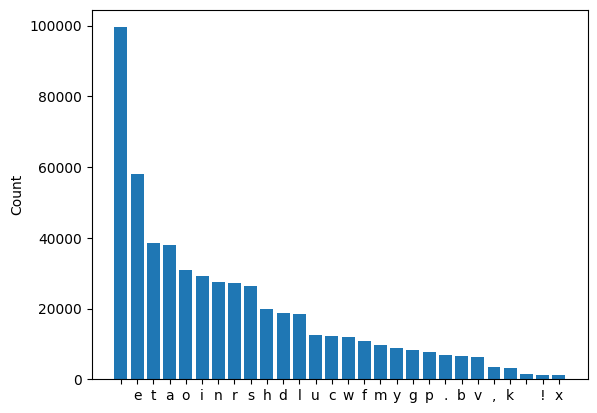

In [51]:
plt.bar([symbol for symbol, frequency in frequences], [frequency for symbol, frequency in frequences])
plt.ylabel("Count")
plt.show()